In [1]:
import os
import scanpy as sc
from scipy import sparse
import numpy as np
import pandas as pd
import scipy.io as sio 

In [2]:
%%time
adataD0 = sc.read_csv('D:/MyData/scEDGE_Generation/data/GSE65525_RAW/GSM1599494_ES_d0_main.csv.bz2')
adataD2 = sc.read_csv('D:/MyData/scEDGE_Generation/data/GSE65525_RAW/GSM1599497_ES_d2_LIFminus.csv.bz2')
adataD4 = sc.read_csv('D:/MyData/scEDGE_Generation/data/GSE65525_RAW/GSM1599498_ES_d4_LIFminus.csv.bz2')
adataD7 = sc.read_csv('D:/MyData/scEDGE_Generation/data/GSE65525_RAW/GSM1599499_ES_d7_LIFminus.csv.bz2')

CPU times: total: 10.5 s
Wall time: 10.5 s


In [3]:
adataD0

AnnData object with n_obs × n_vars = 24175 × 933

In [4]:
adataD2

AnnData object with n_obs × n_vars = 24175 × 303

In [5]:
adataD4

AnnData object with n_obs × n_vars = 24175 × 683

In [6]:
adataD7

AnnData object with n_obs × n_vars = 24175 × 798

In [7]:
adata = sc.AnnData.concatenate(adataD0.T, adataD2.T, adataD4.T, adataD7.T, 
                               batch_key='cluster',
                               batch_categories=['d0', 'd2', 'd4', 'd7', ])

D:\Anaconda3\envs\PyTorch\lib\site-packages\anndata\_core\anndata.py:1785: FutureWarning: X.dtype being converted to np.float32 from float64. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dtype=X.dtype, ...)` to get the future behavour.
  [AnnData(sparse.csr_matrix(a.shape), obs=a.obs) for a in all_adatas],


In [8]:
adata

AnnData object with n_obs × n_vars = 2717 × 24175
    obs: 'cluster'

In [9]:
adata.X

array([[0., 1., 0., ..., 0., 0., 0.],
       [3., 3., 3., ..., 0., 0., 0.],
       [1., 2., 0., ..., 0., 0., 0.],
       ...,
       [0., 2., 0., ..., 0., 0., 0.],
       [2., 1., 1., ..., 0., 0., 0.],
       [0., 2., 0., ..., 0., 0., 0.]], dtype=float32)

In [10]:
adata.obs

,cluster
0-d0,d0
1-d0,d0
2-d0,d0
3-d0,d0
4-d0,d0
...,...
793-d7,d7
794-d7,d7
795-d7,d7
796-d7,d7


In [11]:
adata.obs['label']=adata.obs['cluster']

In [12]:
adata.obs

,cluster,label
0-d0,d0,d0
1-d0,d0,d0
2-d0,d0,d0
3-d0,d0,d0
4-d0,d0,d0
...,...,...
793-d7,d7,d7
794-d7,d7,d7
795-d7,d7,d7
796-d7,d7,d7


In [13]:
adata.var.T

,0610005C13Rik,0610007P14Rik,0610009B22Rik,0610009L18Rik,0610009O20Rik,0610010B08Rik,0610010F05Rik,0610010K14Rik,0610011F06Rik,0610012G03Rik,...,n-R5s134,n-R5s136,n-R5s138,n-R5s139,n-R5s141,n-R5s142,n-R5s143,n-R5s144,n-R5s146,n-R5s149


In [14]:
adata.X = sparse.csr_matrix(adata.X)

In [15]:
adata.X

<2717x24175 sparse matrix of type '<class 'numpy.float32'>'
	with 22487100 stored elements in Compressed Sparse Row format>

In [16]:
sparse.csc_matrix.todense(adata.X)

matrix([[0., 1., 0., ..., 0., 0., 0.],
        [3., 3., 3., ..., 0., 0., 0.],
        [1., 2., 0., ..., 0., 0., 0.],
        ...,
        [0., 2., 0., ..., 0., 0., 0.],
        [2., 1., 1., ..., 0., 0., 0.],
        [0., 2., 0., ..., 0., 0., 0.]], dtype=float32)

In [17]:
sc.pp.calculate_qc_metrics(adata, percent_top=None, log1p=False, inplace=True)

In [18]:
adata = adata[adata.obs.total_counts < 75000, :]

In [19]:
adata

View of AnnData object with n_obs × n_vars = 2713 × 24175
    obs: 'cluster', 'label', 'n_genes_by_counts', 'total_counts'
    var: 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts'

In [20]:
sc.pp.filter_cells(adata, min_genes=200)
sc.pp.filter_genes(adata, min_cells=3)

D:\Anaconda3\envs\PyTorch\lib\site-packages\scanpy\preprocessing\_simple.py:140: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata.obs['n_genes'] = number


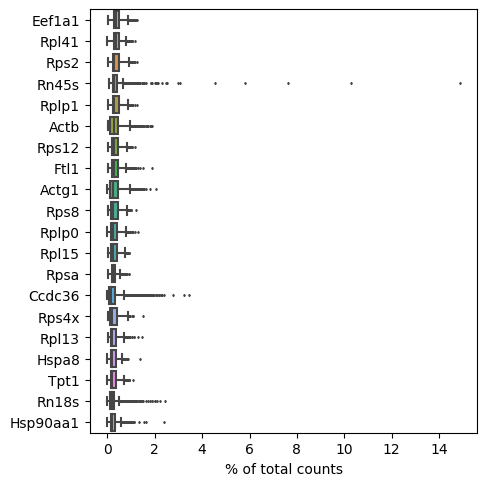

In [21]:
sc.pl.highest_expr_genes(adata, n_top=20, )

In [22]:
adata.var['mt'] = adata.var_names.str.startswith('MT-')  # annotate the group of mitochondrial genes as 'mt'
sc.pp.calculate_qc_metrics(adata, qc_vars=['mt'], percent_top=None, log1p=False, inplace=True)

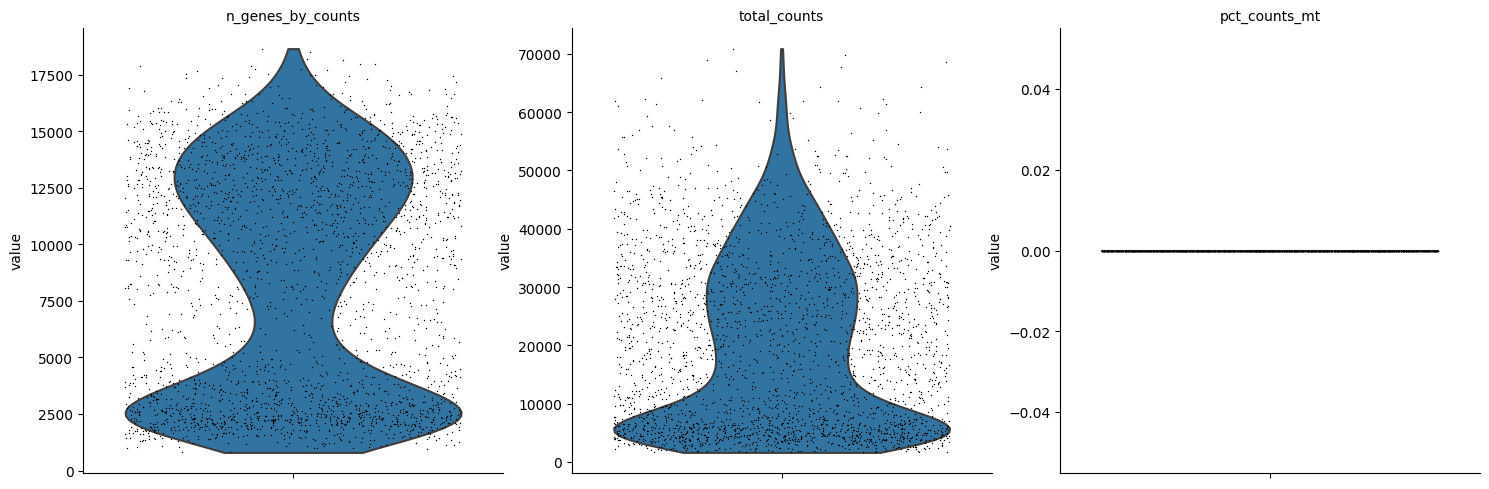

In [23]:
sc.pl.violin(adata, ['n_genes_by_counts', 'total_counts', 'pct_counts_mt'],
             jitter=0.4, multi_panel=True)

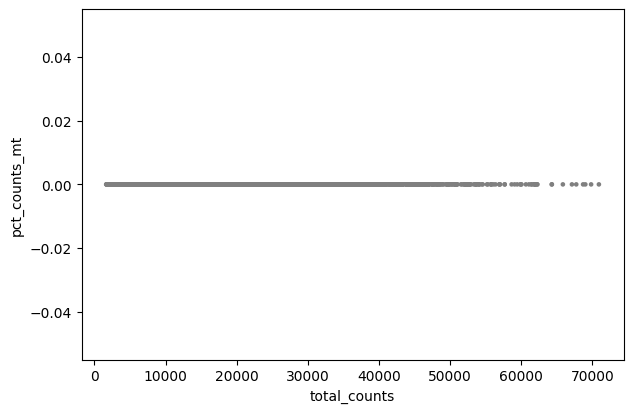

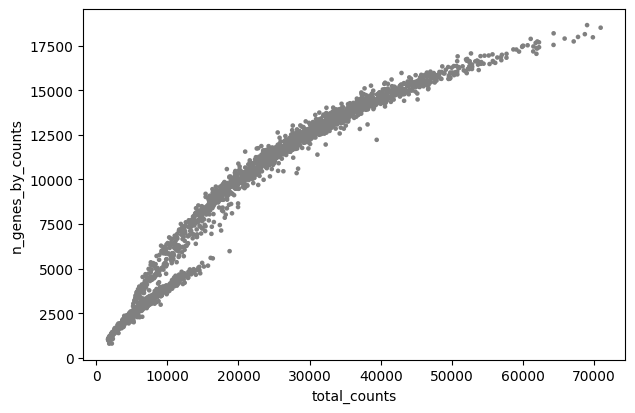

In [24]:
sc.pl.scatter(adata, x='total_counts', y='pct_counts_mt')
sc.pl.scatter(adata, x='total_counts', y='n_genes_by_counts')

In [25]:
adata.raw = adata

In [26]:
folder = os.path.exists('D:/MyData/scEDGE_Generation/data/Klein/processed')

if not folder:
    os.makedirs('D:/MyData/scEDGE_Generation/data/Klein/processed')

adata.write('D:/MyData/scEDGE_Generation/data/Klein/processed/Klein.h5ad')

In [27]:
expression_matrix = adata.X.T  
obs_data = adata.obs  
var_data = adata.var  

In [28]:
obs_data.to_csv('D:/MyData/scEDGE_Generation/data/Klein/processed/klein_obs_data.csv')  
var_data.to_csv('D:/MyData/scEDGE_Generation/data/Klein/processed/klein_var_data.csv') 
sio.mmwrite('D:/MyData/scEDGE_Generation/data/Klein/processed/klein_expression_matrix.mtx', expression_matrix)

In [29]:
!pwd

/d/MyData/scEDGE_Generation/data_preprocessing


## TOP2000

In [30]:
sc.pp.highly_variable_genes(
                    adata,
                    n_top_genes=min(2000, adata.shape[1]),
                    subset=True,
                    # layer="counts",
                    flavor="seurat_v3")

In [31]:
adata_top = adata[:, adata.var.highly_variable]

In [32]:
folder = os.path.exists('D:/MyData/scEDGE_Generation/data/Klein_top2000/processed')

if not folder:
    os.makedirs('D:/MyData/scEDGE_Generation/data/Klein_top2000/processed')
    
adata_top.write('D:/MyData/scEDGE_Generation/data/Klein_top2000/processed/Klein_top2000.h5ad')

In [33]:
expression_matrix_top = adata_top.X.T  
obs_data_top = adata_top.obs  
var_data_top = adata_top.var  

In [34]:
obs_data_top.to_csv('D:/MyData/scEDGE_Generation/data/Klein_top2000/processed/Klein_obs_data_top2000.csv')  
var_data_top.to_csv('D:/MyData/scEDGE_Generation/data/Klein_top2000/processed/Klein_var_data_top2000.csv') 
sio.mmwrite('D:/MyData/scEDGE_Generation/data/Klein_top2000/processed/Klein_expression_matrix_top2000.mtx', expression_matrix_top)